In [1]:
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pickle
# read training data pp-trial3
diabetes_train = pd.read_csv("./content/sample_data/Pima Indians Diabetes Dataset - diabetes.csv")
diabetes_train.head().transpose()


,0,1,2,3,4
Pregnancies,6.000,1.000,8.000,1.000,0.000
Glucose,148.000,85.000,183.000,89.000,137.000
BloodPressure,72.000,66.000,64.000,66.000,40.000
SkinThickness,35.000,29.000,0.000,23.000,35.000
Insulin,0.000,0.000,0.000,94.000,168.000
BMI,33.600,26.600,23.300,28.100,43.100
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288
Age,50.000,31.000,32.000,21.000,33.000
Outcome,1.000,0.000,1.000,0.000,1.000


In [2]:
# Glucose
diabetes_train['Glucose'].replace(0,np.NaN,inplace=True)
mean_Glucose=diabetes_train['Glucose'].mean()
diabetes_train['Glucose'].fillna(mean_Glucose, inplace = True)

In [3]:
# BloodPressure
diabetes_train['BloodPressure'].replace(0,np.NaN,inplace=True)
mean_BloodPressure=diabetes_train['BloodPressure'].mean()
diabetes_train['BloodPressure'].fillna(mean_BloodPressure, inplace = True)

In [4]:
# SkinThickness
diabetes_train['SkinThickness'].replace(0,np.NaN,inplace=True)
mean_SkinThickness=diabetes_train['SkinThickness'].mean()
diabetes_train['SkinThickness'].fillna(mean_SkinThickness, inplace = True)

In [5]:
# Insulin
diabetes_train['Insulin'].replace(0,np.NaN,inplace=True)
mean_Insulin=diabetes_train['Insulin'].mean()
diabetes_train['Insulin'].fillna(mean_Insulin, inplace = True)

In [6]:
# BMI
diabetes_train['BMI'].replace(0,np.NaN,inplace=True)
mean_BMI=diabetes_train['BMI'].mean()
diabetes_train['BMI'].fillna(mean_BMI, inplace = True)

In [7]:
StSc=StandardScaler()

In [8]:
features_X=diabetes_train.drop(["Outcome"],axis = 1)
print(features_X.head())
features_X=  pd.DataFrame(StSc.fit_transform(features_X),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])
print(features_X.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
   Pregnancies   Glucose  BloodPressure  SkinThickness       Insulin  \
0     0.639947  0.865108      -0.033518   6.655021e-01 -3.345079e-16   
1    -0.844885 -1.206162      -0.529859  -1.746338e-02 -3.345079e-16   
2     1.233880  2.015813      -0.695306   8.087936e-16 -3.345079e-16   
3    -0.844885 -1.074652      -0.529859  -7.004289e

In [9]:
observation_Y=diabetes_train['Outcome']
print(observation_Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [10]:
tr_X, te_X, tr_Y,te_Y=tts(features_X,observation_Y, test_size=0.1, random_state=42, stratify=observation_Y)

In [11]:
print("Train X Size:",tr_X.shape)
print("Test X Size:",te_X.shape)
print("Train Y Size:",tr_Y.shape)
print("Test Y Size:",te_Y.shape)

Train X Size: (691, 8)
Test X Size: (77, 8)
Train Y Size: (691,)
Test Y Size: (77,)


In [12]:
from sklearn.svm import SVC

In [13]:
model = SVC(C=1)

In [14]:
model.fit(tr_X, tr_Y)

SVC(C=1)

In [15]:
y_pred = model.predict(te_X) 

In [16]:
from sklearn import metrics
metrics.confusion_matrix(y_true=te_Y, y_pred=y_pred)

array([[43,  7],
       [13, 14]], dtype=int64)

In [17]:


# accuracy
print("accuracy", metrics.accuracy_score(te_Y, y_pred))

# precision
print("precision", metrics.precision_score(te_Y, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(te_Y, y_pred))

accuracy 0.7402597402597403
precision 0.6666666666666666
recall 0.5185185185185185


In [18]:
n_folds = 5

In [19]:
params = {"C": [0.1, 1, 10,100,1000]}

In [20]:
linear_model = SVC()

In [21]:
model_cv = GridSearchCV(estimator = linear_model, 
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = n_folds, 
                        verbose = 1,
                      return_train_score=True)   

In [22]:
model_cv.fit(tr_X,tr_Y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [23]:
cv_results = model_cv.cv_results_
print(pd.DataFrame(model_cv.cv_results_))

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.013957      0.005053         0.008339        0.004362     0.1   
1       0.010904      0.002633         0.008056        0.002778       1   
2       0.013018      0.004719         0.007864        0.003666      10   
3       0.029335      0.005784         0.011045        0.010708     100   
4       0.051965      0.011015         0.006642        0.004878    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0   {'C': 0.1}           0.387755           0.375000           0.479167   
1     {'C': 1}           0.469388           0.645833           0.604167   
2    {'C': 10}           0.510204           0.645833           0.604167   
3   {'C': 100}           0.551020           0.583333           0.520833   
4  {'C': 1000}           0.551020           0.500000           0.562500   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.41666

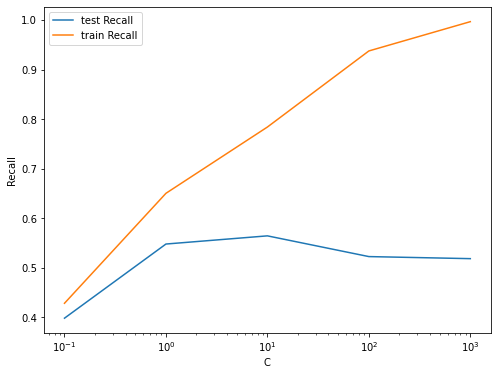

In [24]:
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Recall')
plt.legend(['test Recall', 'train Recall'], loc='upper left')
plt.xscale('log')
plt.show()

In [25]:
#from the above graph we can conclude that Though the training accuracy monotonically increases with C, the test accuracy gradually reduces. Thus, we can conclude that higher values of C tend to overfit the model. This is because a high C value aims to classify all training examples correctly (since C is the cost of misclassification - if you impose a high cost on the model, it will avoid misclassifying any points by overfitting the data).
#Let's finally look at the optimal C values found by GridSearchCV.
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test score is {0} at C = {1}".format(best_score, best_C))

 The highest test score is 0.5645408163265306 at C = 10


In [26]:
# model with the best value of C
model_1= SVC(C=best_C)

# fit
model_1.fit(tr_X, tr_Y)

# predict
y_pred1 = model_1.predict(te_X)

In [27]:
# accuracy
print("accuracy", metrics.accuracy_score(te_Y, y_pred1))

# precision
print("precision", metrics.precision_score(te_Y, y_pred1))

# recall/sensitivity
print("recall", metrics.recall_score(te_Y, y_pred1))


accuracy 0.7272727272727273
precision 0.6
recall 0.6666666666666666


In [28]:
#Now we will use Kernels to further improve the accuracy

In [29]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(tr_X,tr_Y)

#predict
y_predlinear = model_linear.predict(te_X)

# accuracy
print("recall:", metrics.recall_score(te_Y,y_predlinear))

# cm
metrics.confusion_matrix(te_Y, y_predlinear)


#metrics.confusion_matrix(y_true=te_Y, y_pred=y_pred)


recall: 0.5555555555555556


array([[41,  9],
       [12, 15]], dtype=int64)

In [30]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(tr_X,tr_Y)

# predict
y_predNonLinear = non_linear_model.predict(te_X)

In [31]:
print("Recall:", metrics.recall_score(te_Y, y_predNonLinear ))

# cm
print(metrics.confusion_matrix(te_Y,y_predNonLinear ))

Recall: 0.5185185185185185
[[43  7]
 [13 14]]


In [32]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model_rbf = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv_new = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv_new.fit(tr_X, tr_Y)   

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             estimator=SVC(C=1),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [33]:
cv_results_new = pd.DataFrame(model_cv_new.cv_results_)
cv_results_new

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010638,0.004949,0.006125,0.003844,1,0.01,"{'C': 1, 'gamma': 0.01}",0.776978,0.731884,0.789855,...,0.762642,0.028555,7,0.775362,0.786618,0.775769,0.773960,0.788427,0.780027,0.006176
1,0.012374,0.002739,0.006463,0.003256,1,0.001,"{'C': 1, 'gamma': 0.001}",0.697842,0.557971,0.688406,...,0.671452,0.064434,11,0.682971,0.674503,0.688969,0.678119,0.690778,0.683068,0.006199
2,0.012376,0.003675,0.007919,0.002835,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.683453,0.557971,0.659420,...,0.651183,0.051601,12,0.643116,0.674503,0.649186,0.652803,0.636528,0.651227,0.012886
3,0.012133,0.003810,0.005706,0.003257,10,0.01,"{'C': 10, 'gamma': 0.01}",0.769784,0.731884,0.782609,...,0.761203,0.017301,8,0.795290,0.790235,0.788427,0.795660,0.797468,0.793416,0.003464
4,0.012387,0.003496,0.007009,0.004305,10,0.001,"{'C': 10, 'gamma': 0.001}",0.805755,0.724638,0.782609,...,0.766948,0.032544,3,0.768116,0.783002,0.777577,0.772152,0.781193,0.776408,0.005561
5,0.012384,0.003822,0.005681,0.004657,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.697842,0.557971,0.688406,...,0.672902,0.064228,10,0.688406,0.676311,0.692586,0.679928,0.694394,0.686325,0.007069
6,0.014769,0.004397,0.007387,0.003669,100,0.01,"{'C': 100, 'gamma': 0.01}",0.776978,0.724638,0.768116,...,0.769888,0.025762,1,0.826087,0.831826,0.820976,0.810127,0.802893,0.818382,0.010535
7,0.012791,0.003405,0.003227,0.003585,100,0.001,"{'C': 100, 'gamma': 0.001}",0.791367,0.739130,0.789855,...,0.766969,0.023407,2,0.782609,0.781193,0.770344,0.777577,0.799277,0.782200,0.009537
8,0.016549,0.002782,0.003444,0.003929,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.805755,0.724638,0.782609,...,0.766948,0.032544,3,0.764493,0.784810,0.775769,0.772152,0.783002,0.776045,0.007402
9,0.052356,0.003936,0.006366,0.005251,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.769784,0.717391,0.760870,...,0.758305,0.026305,9,0.851449,0.842676,0.840868,0.853526,0.840868,0.845878,0.005477


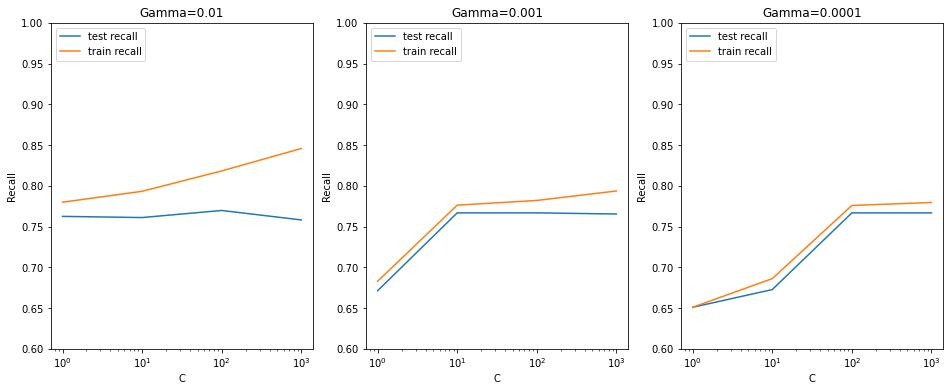

In [34]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results_new[cv_results_new['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Recall')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test recall', 'train recall'], loc='upper left')
plt.xscale('log')


# subplot 2/3
plt.subplot(132)
gamma_01 = cv_results_new[cv_results_new['param_gamma']==0.001]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Recall')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test recall', 'train recall'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_01 = cv_results_new[cv_results_new['param_gamma']==0.0001]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Recall')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test recall', 'train recall'], loc='upper left')
plt.xscale('log')


In [35]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv_new.best_score_
best_hyperparams = model_cv_new.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.7698884370764258 corresponding to hyperparameters {'C': 100, 'gamma': 0.01}


In [36]:
# model with optimal hyperparameters

# model
model_temp = SVC(C=100, gamma=0.01, kernel="rbf")

model_temp.fit(tr_X, tr_Y)
y_p = model_temp.predict(te_X)

# metrics
print("recall", metrics.recall_score(te_Y, y_p), "\n")
print(metrics.confusion_matrix(te_Y, y_p), "\n")

pickle.dump(model_temp, open("../models/SVM.pkl",'wb'))

recall 0.48148148148148145 

[[43  7]
 [14 13]] 

